# Machine Learning Applications in Cancer Research

## 1. Introduction and Motivations

Cancer is a devasting disease that has impacted the lives of many people. It is estimated that 50% of all Canadians will be diagnoised with Cancer in their lifetime, and 25% will die from the disease<sup>[[1]](#canada_cancer_statistics)</sup>. Research in the field is paramount in order to save lives. Interestingly, Machine Learning has become a key area in cancer research, specifically, in cancer susceptibility perdiction, recurrence prediction, and survival prediction<sup>[[2]](#machinelearning_cancer)</sup>. The goal of this project is to explore Machine Learning fundementals and it will be divided into two parts.

The first part of this project will involve applying several Machine Learning techniques to a Breast Cancer dataset. Machine Learning mdoels will be made that can perdict if the tumour cellular sample is benign or malignant. This is important since it can automate part of the diagnosis procedure, thus influence treatement outcomes.  
 
The second part we will conduct survival anaylsis on cancer patients. 



### 1.1 Import Libraries

Import libraries that we will be using throughout this project.

In [3]:
# Import scikit learn (version 0.24.2)
from sklearn import datasets
from sklearn.model_selection import train_test_split 
# Import pandas (version 0.24.2)
import pandas as pd
# Import matplotlib (version 3.0.3)
import matplotlib.pyplot as plt
# Import matplotlib (version 1.19.2)
import numpy as np
# Import math (version 1.1.0)
import math
# Import seaborn (version 0.9.0)
import seaborn as sns

## 2.0 Breast Cancer perdiction using Machine Learning

This section will be divided into two parts. The first part will be importing and exploring the dataset. The second part will be perparing the dataset for analysis and then applying Machine Learning techniques to the dataset. 

### 2.1 Data Exploration

Here we will perform data exploration in order to understand some aspects of the dataset. 

#### 2.1.1 Importing the Data set

We will be using the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Conveniently, the dataset is built into the scikit-learn library and can be imported from there. 

In [1]:
# Load the Breast Cancer data set
data = datasets.load_breast_cancer()

# Convert loaded data into Pandas Dataframe with feature columns
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add target data to Dataframe
df['Diagnosis'] = data.target

# Show Dataframe
df.head()

NameError: name 'datasets' is not defined

Additionally, it is not explicitly stated if the zero in the diagnosis column indicates a maligmant or begnin observation. However, from the [source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), we know that there are 357 benign and 212 malignant observations. Thus, we can determine what zero and one encode by counting the zeros and ones.

In [3]:
df.Diagnosis.value_counts()

1    357
0    212
Name: Diagnosis, dtype: int64

From the above, there are 357 ones and 212 zeros, thus we can infer that zero indicates a malignmant observsation and one indicates a begnin observation. 

#### 2.1.3 Column Names

Next we would like to view all the column names of the dataset. 

In [3]:
# print column names for inspection
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')


#### 2.1.4 Column Description

Before we move on, it would be wise to attempt to describe the columns of the dataset. Initially, [Fine Needle Asipration](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html) is used to collect small tissue/fluid samples from  suspected tumour areas of the breast. A small subsample of the aspiration is then digitized for image analysis. 596 images were perpared and used for anlysis. 

Most cells nucleus in the human body are usually uniform spheroid, whereas tumour cell nucleus tend to have abnormal geometries, as shown in Figure 1<sup>[[3]](#cancercellimage)</sup>. Certain features of these shape irregularitites may help in differentiating between begnin and maligmant tumour cells, thus cell nucleus feature extraction becomes important.
<img src="Images/1280px-Normal_and_cancer_cells_structure.jpg" width=500 height=400 />
<center>Figure 1: Breast tumour cells have irregularities in their shape due to having mulitple nucleus and nucleoulus, in comparison to healthy breast cells. </center>


The first step of nuclear feature extraction is to identify cell nuclei boundraries in each sample image. The researchers used a computer vision framework known as [Active contour model](https://en.wikipedia.org/wiki/Active_contour_model), also known as "snakes", in order to find the boundaraies of identifable cell nuclie in each sample image. Each snake is a series of points that fit to the cell boundaries. Please refer to Figure 2<sup>[[4]](#columndescription)</sup> for an example. The process of how these snakes are fitted is not important in  our use, but the snakes themselves are very important since they will be used to extract geometric features of the cell nuclei.
<img src="Images/snake.jpg" width=500 height=400 />
<center>Figure 2: An example of snake used to find the boundaries of cell nuclei. Please note, this instance of the snake is an initialization created by a specialist. Their algorithm is then ran which causes the snake to converge onto the boundaries of the cell nucleus. </center>


Once the snakes have converged onto the boundaries of the cell nuclei, cell nucleus shape feautes can be determined using those snakes. The features are the following.
<ol>
<li> <b>Radius</b>
To find the Radius of a cell nucleus, the centroid of the snake is first found. Then the Radius is measured by averaging distance between the centroid and each individual snake.
    </li>

<li> <b>Perimiter</b>
As mentioned before, the snake is defined by a set of n points $v_{n}$ where $i=\{0,1,2,...,n-1\}$. Thus, the nucleus perimiter can be determined as follows. First define the distance between two snake points $v_{i}$ and $v_{j}$ as $dist\{v_{i}, v_{j}\}$. Then the perimeter can be calculated as $(\sum\limits_{i=0}^{n-2}dist\{v_{i}, v_{i+1}\}) + dist\{v_{n-1}, v_{0}\}$.
</li>

<li><b>Area</b>
The area of the cell nucleus is computed by count the number of pixels in the interior of the snake, and adding $1/2$ the number of pixels on the perimeter.
</li>

<li><b>Compactness</b> <br>
Compactness of the cell nucleus can be computed as $\dfrac{perimeter^{2}}{area}$
</li>

<li> <b>Smoothness</b> 
The smoothness of the cell nucleus contour is computed by taking the difference from a radial line and the mean of the radial lines nearest to it, as shown in figure 3<sup>[[4]](#columndescription)</sup>. 
<img src="Images/smoothness.jpg" width=500 height=400 />
<center>Figure 3: Radial Lines used to quantify smoothness </center>
</li>

<li><b>Concavity</b> 
Chords are drawn between non-adjacent snake points and the extent to which the boundary of the nucleus is inside each chord is measured to give the concavity of a nucleus, as shown in figure 4<sup>[[4]](#columndescription)</sup>. How this is measure is not specified. Perhapes, the number of snake points within the chords is counted? 
<img src="Images/concavity.jpg" width=500 height=400 />
<center>Figure 4: Chords used to find concavity. </center>
</li>

<li> <b>Concave Points</b>
Similar to concavity, chords are drawn between non-adjacent snake points. The number of chords that have snake points inside that them is counted. For example, the concave points of the cell nucleus in Figure 4 is one, i.e there is only one chord that has snake points inside it.
</li>

<li> <b>Symmetry</b>
First, the major axis of the cell nucleus is found. The major axis is the longest chord drawn through the center of the cell nucleus. Then lines perendicular to the major axis and have endpoints at the boundary are produced, as shown in Figure 5. The differences in legnth of these line segments are used to quantify the symmtry of the nucleus. 
<img src="Images/symmetry.jpg" width=500 height=400 />
<center>Figure 5: Line segments used to quantify the symmetry of a cell nucleus. </center>
</li>

<li> <b>Fractal Demension</b> <br>
Another feature that can help in differentiating between maligment and begnin tumors is the concept of [dimension](https://en.wikipedia.org/wiki/Dimension). How we choose to define dimension is important. Suppose we use [Hamel Dimension](https://en.wikipedia.org/wiki/Dimension_(vector_space)). The cell nucleus contour as defined by a snake is a closed [curve](https://en.wikipedia.org/wiki/Curve). The Hamel Dismension of any curve is 1, that is, it would yield 1 for all nucleaus contours and therefore it would not be a useful as a feature. In our case, [fractal dimension](https://en.wikipedia.org/wiki/Fractal_dimension) will be more useful. The fractal dimension can be defined as the ratio of the change in detail to the change in scale of an object, therefore it is an index of complexity of an object. This can be best illistrated using an example. Refering to Figure 6, let us determine the fractal dimension of a line. First we define a "ruler" as a measuring device. We will the ruler to measure the length of the line in figure 6<sup>[[6]](#fractal)</sup>. 
<img src="Images/line.jpg" width=100 height=10 />
<center>Figure 6: Different number of rulers used to measure the length of a line. N refers to the number of rulers being used. </center> <br>
For $i=1$, the number of rulers we need to use to measure the length of the line is 1. For $i=2$, the size of the ruler is half that of the ruler used in $i=1$, thus you need $2$ rulers to measure the length of the line. For $i=3$, the size of the ruler is $\frac{1}{3}$ that of the ruler used in $i=1$, thus you need $3$ rulers to measure the length of the line, and so on.   Define the number of rulers as N and the scale of rulers as $\epsilon$. We can plot the results. 
</li>
</ol>

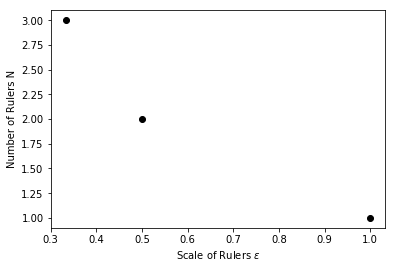

In [5]:
# Number of rulers used to measure object
N = np.array([1, 2, 3])
# Scale of rulers used to measure object
eps = np.array([1, 1/2, 1/3])

# Plot graph
plt.plot(eps, N, 'o', color='black')
plt.xlabel(r'Scale of Rulers $\epsilon$')
plt.ylabel("Number of Rulers N")
plt.show()

<ol>
Estimating the fractal dimension from the plot above can be difficult. However, we can approximate the detail of line by taking the logarithm of the number of rulers N, and the we can approximate the scale by taking the logarithm of scale of the rulers $\epsilon$. Thus, the fractal dimension can therefore be estimated by find the slope of the [regression line](https://en.wikipedia.org/wiki/Linear_regression) of the [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot). 
</ol>

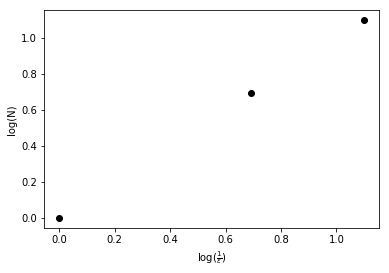

In [6]:
# log of number of rulers
logN= np.log(N)
# Log of scale of rulers
invEps = 1/eps
logInvEps= np.log(invEps)

# Plot graph
plt.plot(logInvEps, logN, 'o', color='black')
plt.xlabel(r'log$(\frac{1}{\epsilon})$')
plt.ylabel("log(N)")
plt.show()

<ol start="10">
We can thus estimate the fractal dimension as the slope of the log-log plot above. The slope of the line from the log-log plot 1, and thus an estimate of the fractal dimension of a line is 1.

The researchers used a similar methode as the above to estimate the fractal dimensions of the cell nuclei. Different sizes of rulers were used to determine different perimeters of the cell nucleus as shown in Figure 7<sup>[[4]](#columndescription)</sup>. The logarithm of both the ruler size and perimeter measured we computed. The slope of the regression line from the log-log plot was used to estimate the fractal dimension of a given cell nucleus, and the final result was subtracted by 1.
<img src="Images/fractal.jpg" width=500 height=400 />
<center>Figure 7: Different number of rulers used to measure the perimeter of a cell nucleus. Smaller rulers give more accurate measurements while larger rulers give less accurate measurments of cell nucleus perimeter. </center> <br>
<li> <b>Texture</b> <br>
The variance grey-scaled intenseties of the image pixels are used to find the texture. <br> <br>
</li>

</ol>

For each cell nuclear feature listed above, the mean, error, and worst value are computed for each image.  

We would also want to know the data type for each column. Specifically, we want to determine if each column is of type numeric or categorical. From the above, we can guess that all the columns are of type numeric but we should still check to be sure. As mentioned previously, each sample contains multiple cell nuclei. The mean of a given nuclear feature is computed by taking the [average](https://en.wikipedia.org/wiki/Average) from all cell nuclei for a given sample. For example, the mean radius column is computed by taking the average of all cell nuclei radius for each sample. The error of a given nuclear  is computed by taking the <a href="https://en.wikipedia.org/wiki/Standard_error">Standard Error</a>  from all cell nuclei for a given sample. For example, the error radius column is computed by taking the standard deviation of all cell nuclei radius for each sample. The worst of a given nuclear feature is computed by taking the largest value of all cell nuclei for a given sample. For example, the worst radius column is computed by taking the maximum value of all cell nuclei radius for each sample.
 

In [7]:
# Display data types for each column
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### 2.1.4 Dataset Statistical Description

Now that we have described the data columns, we now want to describe the observations of the dataset and to convey the most amount of information about the dataset. In python, alot of useful [summary statistics](https://en.wikipedia.org/wiki/Summary_statistics) about a dataset can be obtained by using [describe methode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). 

In [8]:
# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
# Display descriptive statiscts 
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


From the above tables, we can infer alot of statistical information about our data. From the count results, each columnhas 596 observations which is to be expected since 596 sample images were used. The [mean](https://en.wikipedia.org/wiki/Mean) result can be used to measure the [central tendancy](https://en.wikipedia.org/wiki/Central_tendency) for each column of the dataset. [Statistical Disperision](https://en.wikipedia.org/wiki/Statistical_dispersion) can be measured for each column of the dataset using the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) results. The min, 25%, 50%, 75%, and max results are the [five-number-summary](https://en.wikipedia.org/wiki/Five-number_summary) of the dataset columns.  

We would also want to know details about the shape of the distribution for each column. We can measure the shape of the feature distributions by computing [skewness](https://en.wikipedia.org/wiki/Skewness). We can use [Pandas' skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) to measure the skewness for each column. The method computes skewness using _adjusted Fisher-Pearson standardized moment coefficient_. <br>
<div style="text-align: center"> $G_1= \frac{\sqrt{n(n-1)}}{n-2}\frac{\frac{1}{n}\sum^{i=1}_{n}(x_i - \bar{x})^3}{(\frac{1}{n}\sum^{i=1}_{n}(x_i - \bar{x}))^\frac{3}{2}}\tag{1}$</div> <br> 

Note, $G_1$ is the  *Fisher-Pearson coefficient* adjusted for sample size. The term $\frac{\sqrt{n(n-1)}}{n-2}$ goes to zero for large datasets.

In [9]:
# compute skewness and display results
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

We will only conclude that each column has some degree of skewness and this information might be useful in conjunction with other statistics. 

We can plot [histograms](https://en.wikipedia.org/wiki/Histogram) for each column to inquire further into the shape of distribution for each column. We will use the *Square-root choice* to compute the number of bins we will use. It can be computed as follows.
<center>$k=\sqrt{n} \tag{2}$</center> <br>

$n$ is the number of observations and $k$ is the number of bins. The [ceiling](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions) of the value can be taken.

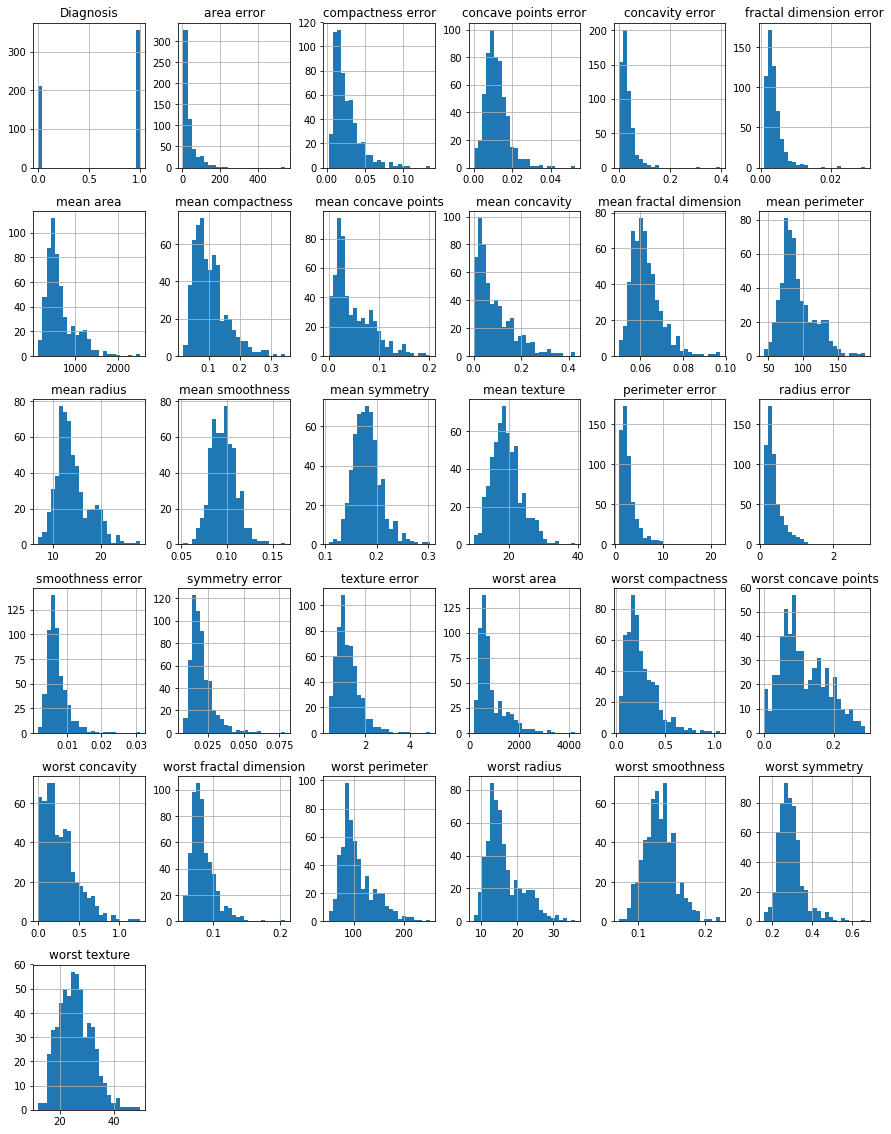

In [21]:
# Calculate the number of bins
n= 596
k = math.ceil(math.sqrt(n))

# Plot histograms 
hist = df.hist(bins=k, figsize=(15,20))

The above histograms confirm that all columns except for diagnosis have right skewness. The diagnosis column is bimodal and has left skewness. 

#### 2.1.4 Statistical Replationships

<a id='correlation'></a>

Next we would want to explore the [correlation and dependance](https://en.wikipedia.org/wiki/Correlation_and_dependence) of features with one another, and the relationship between each feature and the label. 

One way of exploring the relationship between columns is by creating pair plots. Pair plots are [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) where one column is plotted on one axis and another column is plotted on the other axis. They are a visual tool in determining column relationships and on their own, they do not give numeric meterics to measure column dependance. In our case, creating pair plots would be to cumbersome since there are too many columns, so we will not use them in this project. They are still important to consider.

An alternative method in exploring correlation between columns by computing a correlation matrix. Each row of the matrix corresponds to one column of our dataset and each column of the matrix corresponds to one colun of our dataset. Each element of the matrix is the *Sample Pearson Correlation Coefficient* denoted as $\rho$. Given any two columns $A$ and $B$, the coefficient between the two columns can be computed as follows. 
<center>
$r_{AB} = \frac{\sum_{i=1}^{n}(a_i - \bar{a})(b_i - \bar{b})}{\sqrt{\sum_{i=1}^{n}(a_i - \bar{a})^2}\sqrt{\sum_{i=1}^{n}(b-\bar{b})^2}} \tag{3}$
</center> <br>

$a_i$ corresponds to an observtion in column $A$ and $b_i$ corresponds to an observtion in column $B$.$\bar{a}$ and $\bar{b}$ correspond to the means of columns $A$ and $B$, respectively. n corresponds to the number of observation which in this case is 596. 

The resulting coefficents are in the range +1 to -1. If the $r$ value is close to +1, it is an indication that the two columns being considered, are strongly positively correlated with one another. If the $r$ value is close to -1, it is an indication that the two columns being condsidered, are strongly negatively correlated with one another. If the $r$ value is close to 0, it is an indication that the two columns are not correlated with one another. Note, that the *Perason correlation coefficent* works well for linear relationships but might not accuratly reflect correlation between two columns when the relationship is nonlinear. For nonlinear relationships, the [Spearman Correlation Coefficent](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)  might be a better choice. Addtionally, visualization techniques such as the aforementioned pair plot might yield inightful results. However, for our case, the *Pearson Correlation Coefficent* will suffic.   

The matrix correlation matrix produced is [symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix) with respect to its [main diagonal](https://en.wikipedia.org/wiki/Main_diagonal), thus we could either use the [lower triangle](https://en.wikipedia.org/wiki/Triangular_matrix) or [upper triangle](https://en.wikipedia.org/wiki/Triangular_matrix) for our analysis. The correlation matrix can be visualized using a [heatmap](https://en.wikipedia.org/wiki/Heat_map).

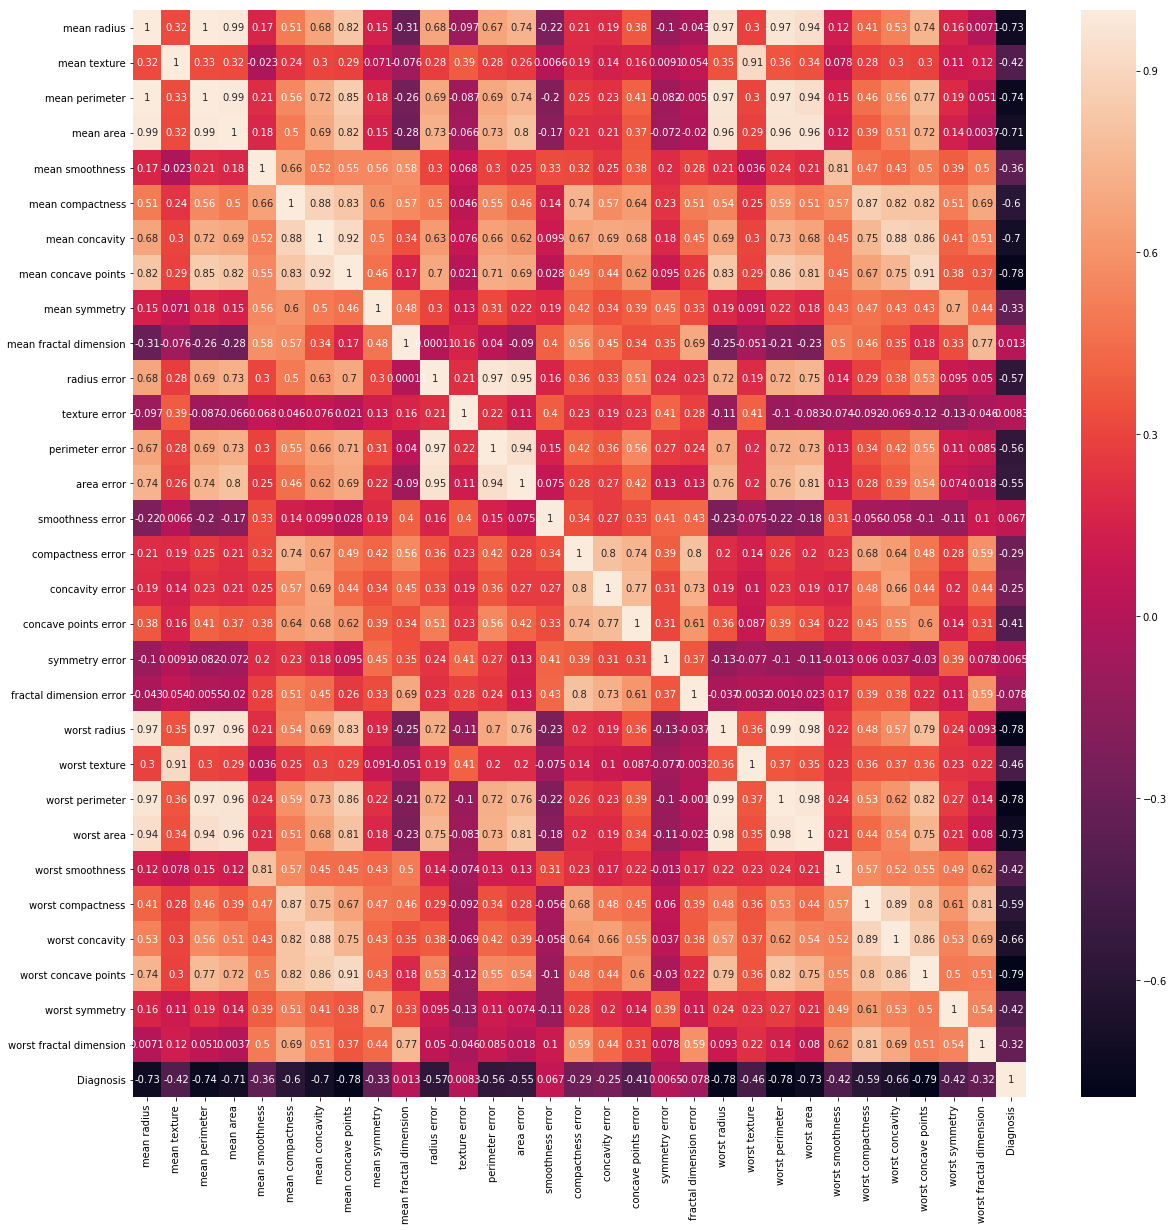

In [4]:
# Compute correlation matrix 
corrmat = df.corr(method='pearson')
# Display correlation matrix using heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)

Several observations can be made with regards to the relationships between feature columns.
<ul> 
    <li>
        The radius, perimeter, and area features have strong positve correlation with one another. This is to be expected. For a circle, both the cicumference and area are depedant on the radius. This relationship can be extended to any closed curve. Thus,  the larger the radius of a cell nucleus, the larger the area and perimeter of the cell nucleus. 
    </li>
    <li>
        The compactness, concave points, and concavity features have strong positive correlation with one another. The relationship between concave points and concavity is to be expected since they both measure how much the contour lies within a given set of line segments. In regards to compactness, one would expect that compactness would be strongly posivtly correlated with perimeter and strongly negatively correlated with radius. However, this is not the case. It is probably due to the fact that the relationship between compactness, and perimiter and area is nonlinear and thus not captured accuratly by using *Pearson Correlation Coefficent*. The relationship between compactness and cancavity is, however, not very straightforward. Compactness is minmized when the cell nuclues contour is a perfect circle and it increases with irregularity of the contour. Increased irregularity of contour increases concavity of the contour thus explaining the relation between compactness and concavity. This can be best illustrated using Figure 8. Suppose both shapes are the contours of a cell nucleus. The compactness of the cell nucleus on the right is larger than the one of the left since it has a larger perimter and smaller area. Similarly, the concavity of the cell nucleus on the right is also more than the one on the left since the right cell nucleus has one indentation while the left cell nuclues has no identation. 
 <img src="Images/compactness.jpg" width=500 height=400 />
        <center>Figure 8: Two cell nucleus used to visualize the correlation between compactness and concavness.</center>
    </li>
    <li>
        Corresponding features for mean, error, and worst columns tend to be positvely correlated with one another, that is, mean radius, error radius, and worst radius are positivly correlated with one another, and so on. The reason for the correlation is because, the mean, error, and worst correspond to measurements for the same sample of cell nuclei. Mean and worst are strongly positvely correlated. This is also to be expected since worst is essentially the max value for a sample of cell nuclei. Thus, a larger worst value would yeild to larger mean value. Error is also positively correlated with worst. Standard Error is dependant of Standard Deviation and thus a measure of the spread of a distribution. Larger worst values correlate with larger error values since larger worst vlaues indicate a larger spread of the distribution. Lastly, error is psotively correlated with mean aswell albeit not a strong correlation. The correlation is weaker than that of error with worst. However, this correlation is much harder to decihpher. For the distributions that we have, generally, there is no relationship between standard diviation and mean so there must be another reason for the correlation between standard error and mean. Another reason might be the number if nuclei per sample. Smaller number of nuclei could cause both the mean and standard error to increase, thus explaining the weak positive correlation. However, this is speculation.  
    </li>
</ul>

Several observations can be made with regards to the relationships between feature columns and the label.
<ul>
    <li>
        The worst feature columns tend to have the strongest correlation with the Diagnosis label. This is intuitive because larger worst values indicate gretter irregularity in the cell nuclei, and thus indicate higher chance of malignancy. The correlation is negative because malignant samples are coded as zeros, so larger worst values correspond with smaller label values (zeros).
    </li>
    <li>
        The error feature columns tend to have the weakest correlation with the Diagnosis label. A larger spread of the distribtion might indicate larger values for any given feature, and henceforeth indicate a higher chance of malignmancy. The correlation is negative because malignant samples are coded as zeros, so larger error values correspond with smaller label values (zeros).
    </li>
    <li>
        The mean feature columns tend to have strong correlation with the Diagnosis label. However the strength of the relationship betwen label and mean columns is weaker than that of between label and worst columns. The worst features are the largest values for a given sample. The greater the worst value, the greater the irregularity of the cell and thus a greater probability of malignancy. Averages are sensitive to such large values. Thus, the larger the worst value, the larger the mean value. However, some smaples may contain normal healthy cells since fine needle aspiration does not differentitate between healthy and cancerous cells. The cell nucleus feature of normal cells tend to have smaller values than that of malignant cells. Since they will be mixed with irregular cells for a given smaple, they will decrease the value of the mean.  They essentially act as noise when trying to differntiate betwen begnin and maligant using cell nucleus features. This explains why the mean feature columns do not have a strong correlation with the label column, as does the worst feature columns with the label column. The correlation is negative because malignant samples are coded as zeros, so larger mean values correspond with smaller label values (zeros).
    </li>
    <li>
        The correlation between nuclear size feartures and diagnosis is stronger than the correlation between nuclear shape and diagnosis. This relationship coincides with finds by other researchers such as Abdalla et al<sup>[[7]](#abdalla)</sup>. The reason for the relationships cannot be currently explained in detail since the cellular mechanisms for nuclear size and shape irregularaties is largely unkown<sup>[[8]](#morphology)</sup>.  However, a commnet will be made on fractal dimensions column. Some of the cell nucleus contours do not exhibit similar patterns at increasingly smaller scales and thus cannot be regarded as [fractals](https://en.wikipedia.org/wiki/Fractal), and hence fractal dimensions might not fully capture their shape complexity. This might be a reason why fractal dimensions is poorly correlated with diagnosis. 
    </li>
</ul>

These relationships are important. If we have too many columns, we may choose to omit columns that have weak correlation with the label column, in order to spead up our analysis. If we are performing [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression), we would omit columns that are strongly correlated with other columns since colinearity of columns would break one of the [assmptions](https://en.wikipedia.org/wiki/Linear_regression#Assumptions) of linear regression. Finally, the strength of correlation between columns can provide useful insights into the nature of our work and provide direct for further research.

### 2.2 Machine Learning Breast Cancer Prediction

In this section, we will first perpare data for analysis, then perform feature selection, and finally apply several Machine Learnign algorithms in order to differntiate begnin tumor from maligmant tumor.


#### 2.2.1 Machine Learning Overview

Before we procced, it will be useful to give a quick overview of the basics of Machine Learning so that we all have a good background on the basics of Machine Learning concepts.

##### 2.2.1.1 Terminology and Notation

<a id='terminology'></a>

The column "Daignosis" is refered to as the label or output of the dataset, and is denoted $y$ . Then the matrix that is the rest of the data can be refered to as $X$. To reiterate, $$ The rows of $X$ are refered to as objects, examples, data points, observations, or in our case, samples. The columns of $X$ are referred features, inputs, perdictors, or variables. Let $n$ denote the number of observations and $d$  as the number features.

The notation used are the following. The outcomes $y$ and observations $x_i$ can be repersented as column vector.
<div style="text-align: center"> $ 
\begin{equation}
    y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix} \hspace{50pt}
    x_i = \begin{bmatrix}
           x_{i1} \\
           x_{i2} \\
           \vdots \\
           x_{id}
    \end{bmatrix}
\end{equation}$ </div>
Each row of the matrix $X$ is the [transpose](https://en.wikipedia.org/wiki/Transpose) of the column vector $x_i$ and can be repsersented as such.
<div style="text-align: center"> $ 
\begin{equation}
    x_i =  \begin{bmatrix}
           x_{11} & x_{12} & x_{13} & \cdots x_{1d} \\
           x_{21} & x_{22} & x_{33} & \cdots x_{4d} \\
           \vdots \\
           x_{n1} & x_{n2} & x_{n3} & \cdots x_{nd} \\
    \end{bmatrix} =
    \begin{bmatrix}
           \cdots & x_{1}^T & \cdots \\
           \cdots & x_{2}^T & \cdots \\
           & \vdots & \\
           \cdots & x_{n}^T & \cdots \\
    \end{bmatrix}
\end{equation}$ </div> 

##### 2.2.1.2 Machine Learning Basics

<a id='basics'></a>

Generally, Machine Learning refers to algorithms that build models using training data, and those models can be used to make perdiction when given new data. Machine Learning can be divided into three main categories: [superivsed learning](https://en.wikipedia.org/wiki/Supervised_learning) and [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning). There are other categories such as semi-supervised learning and [reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning) but those will not be considered here.

_Supervised Machine Learning_
In supervised learning, the dataset used to create models have both inputs and outputs. The models created can then map given inputs to outputs. 

_Unsupervised Learning_
Unsupervised learning consists of creating models using datasets that have inputs (training examples) only.   

Furthermore, it would be wise to discuss parametric models, non-parametric models, and hyper-parameters, since they are important and a source of consfusion for some. 

_Parametric Models_
Parametric models have fixed number of parameters that define the model itself. The number of parameters is independant of the size of the training dataset.

_Non-parametric Models_
Non-parametric models are harder to define. However, generally speaking, non-parametric models do not have fixed number of paramters. Their parameters can change depending on the size of the training dataset.

_Hyperparamters_
[Hyperparamters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) are parameters that define the complexity of the model. They are defined prior to the training  process. 

These are abstract concepts that will become much clearer and concert in later parts.

##### 2.2.1.4 Independant and Indentically Distributed Random Varibale Assumption

One of the main assumptions underlining the success of machine learning perdictions is that the observations are [Independant and Indentically Distributed (I.I.D)](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) [Random variables](https://en.wikipedia.org/wiki/Random_variable).

Formally I.I.D can be formulated as such.Let $I$ be a subset of [set of real numbers](https://en.wikipedia.org/wiki/Real_number). For a given random variable $Z$, the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_functions) can be denoted as $F(Z) = P(Z \leq z)$ where $z \in I$. Then n random variables $Z_1, ..., Z_n$ are I.I.D if and only if the following two conditions hold.
1. <p style="text-align:left;">
    $F_{Z_1}(z)$ = $F_{Z_k}(z)$ 
    <span style="float:right;">
        $\forall k \in \{1,..,n\} \space and \space  \forall z \in I$
    </span>
</p>
2. <p style="text-align:left;">
    $F_{Z_1,...,Z_n}({z_1,...,z_n})$= $F(Z_1)\cdot...\cdot F(Z_k)$ 
    <span style="float:right;">
        $\forall z_1,...,z_n \in I$
    </span>
</p>
<br>

Informally, we can state I.I.D as follows. Any two random variables $Z$ and $T$ are said to be I.I.D if and only if they satisfy the given two conditions.
1. <b>Identically Distributed</b>. Two random variables $Z$ and $T$ are identically distributed if they both share the same [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution).
2. <b>Independant</b>. Two random variables $Z$ and $T$ are idnependant of one another if the outcome of one variable gives us zero infromation on the outcome of the other variable. 
That is, depsite the variables be different from one  another, they all convey the same information about a given phenomena. 

In our case, the patients were choosen randomly, and thus the random variable outcome would be the diagnosis of the patient tumor sample. If we assume our data is I.I.D, it would imply that despite the genetic differnces between patients, all patients convey the same information about the genetic mechanisms underlining nuclear morphology of tumor cells. There are two main reasons why our data would not be I.I.D.
- <b>Not Independant</b> If different samples come from the same patient, then the rows of the dataset corre would be correlated. Thus, we can determine the diagnosis of one row based of the information from another correlated row and so correlated rows are not independant. 
- <b>Not Identically Distributed</b> The main reason is the data is not indtically distrivbuted is that the data generation process differs between samples. There are two main reasons this could be the case. One: the smaples come from different populations then the underlining genetic mechanisms for nuclear morphology of the the tumor cells could be vastly different, and henceforth the sample/observation come from different distribtuions. Two: the samples were obtained using vastly different techniques or processes. 

Genarally speaking, I.I.D assumption is usually violoated to some degree for real-world data. We have to determine how much it is violated. The original research paper does not explicitly state that no two samples come from the same patient, nor does it explicility state that samples were collected from different populations. Hencefore, we  make two assumption concerning the data.
- One we will assume that all or most smaples each correspond to different patients, and each patient has a different genetic profile. 
- Two, the samples were collected from the same hospital. Thus, it can be assumed that most patient come from the same sampled population. In addition, the data collection method was roughly the same for each sample. That is, all samples were collected using fine needle aspiration, and Active Contour Model was used to find cell contours. 
Therefore, from now one we will assume that the I.I.D assumption holds for our dataset.


##### 2.2.1.3 Validation

Once we have a model, we need to determine its predictive power. We need to determine how accuratly it can perdict outcomes when given new unseen data. By unseen data, we imply data not used in the training process. This is typically done by splitting the data we already have into two sets: a traing set and a test set. The split occurs along the rows/samples and not along features/columns. The test set is sometimes referred to as validation set. The training set is used to create the model and the process in which the model is created is typically referred to as _training phase_. How the training set is used to create a model will be discussed in detail in later sections. There are different ways the data is split, but in this presentation, wen will talk about two methodes, namely _Holdout_method_ and _k-fold cross validation_.

_Data Shuffling_. Prior to splitting, the dataset should be shuffled, in other words, the rows are the datset should be randomly rearranged. This is done to pervent model bias during the training phase. To illistrate why shuffling is important consider the following example. In our dataset, we have 212 zeros encoding malignmant outcomes and 357 ones encoding begnin outcomes. Suppose we sort the dataset with regards to the Diagnosis column, then first 357 rows would all be zeros and the last 212 rows would be all ones. Suppose the traing-test split was done in the following manner. The training set is comprised of the first 212 rows and the test set is comrpised of the last 357 rows. This would cause issues since the model will be bias towards perdicting malignant outcomes when given new data, since begnin cases were not exposed to the model during the traing phase. Henceforth, the need for shuffling the data prior to the train-test split.

_Golden Rule_. One other main issue is the violation of the Golden Rule, also known as [Information Leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)). The test data must not influence the training phase in anyway, thus the split should occur at the very start of any Machine Learning project. If information from the test set is involved in the training phase  in anyway, then the test set essentially becomes part of the traning set and thus is compromised.

_Holdout Method_. We begin with our first train-test split method. Simply, a section of the data is assigned to be the training set and the rest is assigned to the test set. 

_k-fold cross-validation_.Now we turn our attention to k-fold cross-valdiation. The data is split into equally sized k subsamples. One of the subsamples is used as the test set and the rest of the subsamples are used as the training set. k iterations are performed were in each iteration a different subsample is used as the test set. After k itertations, the errors are averaged to produce an overall estimation of the perdictive power of a given model. 

Once we have developed a model, we want to determine how well it can perdict diagnosis for new samples  where the outcome diagnosis is not yet known. As mentioned, we can use the test data to gauge the accuracy of the model developed at perdicting outcomes not yet known. Specifically, we are concerned with the test error. The test error is the percentage of wrong perdictions made by the model.By wrong perdiction, we imply that for any given sample, the model perdicts malignmant  when tumor sample is begnin and begnin when the tumor sample is malginmant. Furthermore, the defference between the test error and training error is called the approximation error. The smaller the approximation error, the closer the training error is to test error. If the training error is close to the test error and if they are both small, then it would be reasonable to conclude that the model's perdictive power is probably good. The test error can be written in terms of the approximation error and training error as follows.
<center>
$E_{test} = (E_{test}-E_{train})+E_{train} \tag{4}$
    $= E_{Approx} + E_{train}$
</center> <br>
Two conclusions can be deduced from the above equation. 

1. Large training error would result in large test error. This is often the results of _underfitting_. Underfitting refers tot he fact that the model does not capture the underlining trends of the data. It is usually cause by overly simplistic models or too few feaures or observations. 
2. Large approximation error would result in large test error. This is often the result of _overfitting_. Overfitting refers to the fact that the model becomes sensitive to peculararities of the training data. It is usually cause by overly complex model. 

In either case, having more data would eliviate the problem. In addition, there exists a supposed goldilocks region where the model is not too simple and not too complex for it to be effective at perdicting real-world data. 
<br>

Lastly, another main cause for large errors would be a gross vioation of the I.I.D assumption. Specifically, the traing data and the testing data are not identically distributed. If the training data comes from a different distribtuion, then the predictions of the model for the test data would be useless and different from the actual outcomes and thus would result in large errors. 

#### 2.2.2 Train-Test Split

As metioned previously, the absolute first thing to do before enything else is split the data into a training set and a test set. 

In [9]:
# Split the Dataframe along the column into features and labels.
# X contains features and observations
X = df.iloc[:, 0:-1]
# y contaisn the labels for each observation
y = df.iloc[:,-1]

# Split the data. 
# Test size should be 25% of the size of the total data. This was an arbituary descision.
# Set random state so that the split can be reproducable..
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

#### 2.2.3 Data Cleaning

Prior to conducting any analysis, data cleaning should be performed. Data cleaning involves detecting and fixing or removing problems with the dataset. These problems can include incorrectly formmated data, missing data, or duplicated data. If these problems are not corrected, they can cause issues when performing analysis on the datasets. 

Fortuantly, our dataset has already been througly perpared for analysis in advance. However, generally this is not the case. Here we will outline general percodures in order to perpare/clean the data for analysis.

<ol>

<li>
The first problem is duplicated values in the dataset, specifically, duplicated rows or columns. Duplicated rows are problematic since they would result in the violation of the I.I.D assumption. If rows in both training and test sets are duplciates of one another, it would cause information leakage, resulting poor performance of the trained model. Duplciate columns can cause issues for certain Machine Learning models such as linear regression since it is an instance of [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity).
</li>
    
<li>
Next we turn our attention to [missing values](https://en.wikipedia.org/wiki/Missing_data). There are different ways missing data can be present in our dataset. Some missing data are label as NA which can be recongnized by python. However, there exists types of missing data that are not easily identifable.
<ul>
A given column has empty values, which are just missing vlues that are not label as NA.
</ul>
    
<ul>
A given column has incorrectly formatted data. For example, a string is present a column that should have only numeric type data. This case usually requires further inquiry once detected. In one instance, the string value might be a numeric value repersented as a string. In such a case, it should just be converted to numeric type. In all other cases (for example, the string "cat", is present in a numeric type column), the values incorrectly formatted data should be treated as a missing value.
</ul>

Once the missing data is identified, there are a number of ways of dealing with it. The simplest way is to discard the observation that contains the missing value. However, this method can result is loss of large amounts of otherwise valuable data. There are also statistical approaches to replace missing values. One method is to replace missing values for a given column with the mean of all non-empty values for that column. One needs to be careful here. Suppose the column mean is computed prior to train-test split. If the missing values are replaced and end up in the training set, then computed mean used to replace the mssing value would carry over information from the test set into the traing set and thus leading to infromation leakage. This is percisily why traing-test split occurs before data cleaning. 

</li>

<li>
Lastly, we may be concerned with outliers in the dataset. Outliers might be input mistakes and such values should not be incorperated into an analysis. However, in our case the outliers are probably not input mistakes and are infact real data. Larger values that could be concidered as outliers can be used to distinguish between begnin and malignant outcomes, and thus are important in this context. 
</li>

</ol>

#### 2.2.4 Feature Selection

Certain features might not contribute perdictive power to a model since they act essential as noise. Other features may contribute very little to the perdictive power of a model. Feature selection is the process of identifying such features and removing them prior to modelling their data. 

There are three main reasons for doing feature selection. 

<ol>
    <li>
        It is time consuming and expensive to collect data. If certain features are unessesary, then researchers would not need to waste time and money on collecting data for those features. 
    </li>
    <li>
        Certain machine learning algorithms take longer to run when given more features, so fewer features would cause 
    </li>
    <li>
        Including features that do not influence outcomes can cause the model to recognize patterns that don't exists, which in itself can be viewed as a form of overfitting. 
    </li>

</ol>


Note, selection of features in [Satatistical Relationship section](#correlation) should not be confused with the Feature Selection in this section. There, features were considered in isolation to one another. Here, we aim to look at features together. 

In order to discuss feature selection, we must first introduce several machine learning algorithms.

<b>Linear Regression</b>

We will not be using Linear Regression directly in this project but feature selection is built upon it. Hence, we will discuss it here. For this section please, refer back to the [terminology section](#terminology) for the terminology and notations we will be using. 

Suppose there is a linear relationship between a given outcome $y_i$ and its corresponding observation $x_i$. We can model the linear realtionship by taking the weighted values of $x_i$.
<div style="text-align: center"> $\widetilde y_i = \vec{w}^T \cdot \vec{x}_i \tag{5}$ </div> 
We can determine the weights $w$ by taking finding the [minimum](https://en.wikipedia.org/wiki/Maxima_and_minima) of a [loss function](https://en.wikipedia.org/wiki/Loss_function). In simpler terms, we want to find weights that minimize the difference between the perdicted values $\widetilde y_i$ and the actual values $ y_i$. We can take the [sum of squared residuals](https://en.wikipedia.org/wiki/Residual_sum_of_squares) as the loss function. The sum of the residual is taken since positive and negative terms can cancel each other other, resulting in poor perdicators. Note, an alternative approach would have been to take abolute value instead of squaring the residual. Such a loss function is not differentiable everywhere and thus we will only consider the Sum of Squared Residuals. We get the following loss function.
<div style="text-align: center"> $L(w) = \sum_{i=1}^{n} (y_i - \vec{w}^T \cdot \vec{x}_i)^2 \tag{6}$ </div> 
We would want to rewrite the Sum Notation into Matrix Notation since many mathematical Python packages are optizmized to deal with matrices. We begin with the following: let $\vec{r}$ be the vector repersenting the residual. 
<div style="text-align: center"> $\vec{r} = \begin{equation}
    \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix}
    - \begin{bmatrix}
           \vec{w}^T \cdot \vec{x}_{1} \\
           \vec{w}^T \cdot \vec{x}_{2} \\
           \vdots \\
           \vec{w}^T \cdot \vec{x}_{n}
    \end{bmatrix} = \vec{y} - X\vec{w}
\end{equation}\tag{7} $ </div>
Finally, then the loss function can be written as the following.
<div style="text-align: center"> $\sum_{i=1}^{n} (y_i - \vec{w}^T \cdot \vec{x}_i)^2 = \sum_{i=1}^{n} (r_i)^2 \tag{8}$ </div>
<div style="text-align: center">  $= \sum_{i=1}^{n} (r_i)(r_i) \tag{9}$ </div>
<div style="text-align: center">  $= \vec{r}^Tr \tag{10}$ </div>
<div style="text-align: center">  $= \Vert \vec{r} \Vert^2 \tag{11}$ </div>
Finally, we arrive at the following loss function.
<div style="text-align: center">  $ L(w) = \Vert \vec{y}- X\vec{w} \Vert^2 \tag{12}$ </div>
Now, in order find the w that minimizes the function, we need to take the [Gradient](https://en.wikipedia.org/wiki/Gradient) of $L(w)$. Prior to taking the gradient it would make things easier if we expanded the norm.
<div style="text-align: center">  $ \Vert \vec{y}- X\vec{w} \Vert^2 = (\vec{y}- X\vec{w})^T(\vec{y}- X\vec{w}) \tag{13}$</div>
<div style="text-align: center">  $ = (\vec{y}^T- \vec{w}^TX^T )(\vec{y}- X\vec{w}) \tag{14}$</div>
<div style="text-align: center">  $ = \vec{y}^T\vec{y} + \vec{y}^T X \vec{w} + \vec{w}^TX^Ty - \vec{w}^TX^TX\vec{w} \tag{15}$</div>
We note the following. The dimensonalities of the term $y^T X \vec{w}$ is $1xnxnxdxdx1$ which is the dimensional equivalent of $1x1$. The dimensionalities of the term $\vec{w}^TX^T\vec{y}$ is $1xdxdxnxnx1$ which is the dimensional equivalent of $1x1$. Hence, both terms $\vec{y}^T X \vec{w}$ and $\vec{w}^TX^T\vec{y}$ are scalars. Futhermore, we also observe that $(\vec{w}^TX^T\vec{y})^T = \vec{y}^T X \vec{w}$. Since $scalar^T=scalar$, then the terms $\vec{y}^T X \vec{w}$ and $\vec{w}^TX^T\vec{y}$ are equivalent and one can be rewritten as the other, which yields the following results.
<div style="text-align: center">  $ L(w)= \vec{y}^T\vec{y} + 2\vec{y}^T X \vec{w} - \vec{w}^TX^TX\vec{w} \tag{16}$</div>
Now, we can take the gradient of the loss function with respect to $\vec{w}$.
<div style="text-align: center">  $ \nabla_w L(w)= \nabla_w( \vec{y}^T\vec{y} + 2\vec{y}^T X \vec{w} - \vec{w}^TX^TX\vec{w}) \tag{17}$</div>
<div style="text-align: center">  $ = \nabla_w(\vec{y}^T\vec{y}) + \nabla_w(2\vec{y}^T X \vec{w}) - \nabla_w(\vec{w}^TX^TX\vec{w}) \tag{18}$</div>
Equation 18 was derived from equation 17 using the [distributive property of the gradient](https://en.wikipedia.org/wiki/Vector_calculus_identities#Distributive_properties). Let us now consider the three terms speratly. Concerning the first term, $\vec{y}$ is independant of $\vec{w}$ and so the gradient of the first term is zero.
<div style="text-align: center">  $ \nabla_w(\vec{y}^T\vec{y}) = 0 \tag{19}$</div>
We will compute the gradient for the second term as follows. For convienance, let $\vec{a} = 2\vec{y}^T X$ and we can now compute the gradient.
<div style="text-align: center">  $ \nabla_w(2\vec{y}^TX\vec{w}) = \nabla_w(\vec{a}\vec{w})  \tag{20}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \frac{\partial}{\partial_{w_1}}\sum_{i=1}^da_iw_i \\
           \frac{\partial}{\partial_{w_2}}\sum_{i=1}^da_iw_i \\
           \vdots \\
           \frac{\partial}{\partial_{w_d}}\sum_{i=1}^da_iw_i
         \end{bmatrix}
\end{equation} \tag{21}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           a_1 \\
           a_2 \\
           \vdots \\
           a_d
         \end{bmatrix}
\end{equation} \tag{22}$</div>
<div style="text-align: center">  $  = \vec{a}  \tag{23}$</div>
Therefore, the gradient of the second term is the following.
<div style="text-align: center">  $ \nabla_w(2\vec{y}^TX\vec{w}) = 2 \vec{y}^TX  \tag{24}$</div>
We will compute the gradient for the thrid term as follows. For convienance, let $X^TX = A$ and we can now compute the gradient.
<div style="text-align: center">  $ \nabla_w(\vec{w}^TX^TX\vec{w}) = \nabla_w(\vec{w}^TA\vec{w})  \tag{25}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \frac{\partial}{\partial_{w_1}}\sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}w_j \\
           \frac{\partial}{\partial_{w_2}}\sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}w_j \\
           \vdots \\
           \frac{\partial}{\partial_{w_d}}\sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}w_j \\
         \end{bmatrix}
\end{equation} \tag{23}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial}{\partial_{w_1}}(w_ia_{ij}w_j) \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial}{\partial_{w_2}}(w_ia_{ij}w_j) \\
           \vdots \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial}{\partial_{w_d}}(w_ia_{ij}w_j) \\
         \end{bmatrix}
\end{equation} \tag{24}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_1}}a_{ij}w_j \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_2}}a_{ij}w_j \\
           \vdots \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_d}}a_{ij}w_j \\
         \end{bmatrix} +
     \begin{bmatrix}
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_1}} \\
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_2}} \\
           \vdots \\
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_d}} \\
         \end{bmatrix}
\end{equation} \tag{25}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_1}}a_{ij}w_j \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_2}}a_{ij}w_j \\
           \vdots \\
           \sum_{i=1}^d\sum_{j=1}^d\frac{\partial w_i}{\partial_{w_d}}a_{ij}w_j \\
         \end{bmatrix} +
     \begin{bmatrix}
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_1}} \\
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_2}} \\
           \vdots \\
          \sum_{i=1}^d\sum_{j=1}^dw_ia_{ij}\frac{\partial w_j}{\partial_{w_d}} \\
         \end{bmatrix}
\end{equation} \tag{26}$</div>
<div style="text-align: center">  $  = \begin{equation}
    \begin{bmatrix}
           \sum_{j=1}^da_{1j}w_j \\
           \sum_{j=1}^da_{2j}w_j \\
           \vdots \\
           \sum_{j=1}^da_{dj}w_j \\
         \end{bmatrix} +
     \begin{bmatrix}
          \sum_{i=1}^dw_ia_{i1} \\
          \sum_{i=1}^dw_ia_{i2} \\
           \vdots \\
          \sum_{i=1}^dw_ia_{id} \\
         \end{bmatrix}
\end{equation} \tag{27}$</div>
<div style="text-align: center">  $  = (A + A^T)w  \tag{28}$</div>
<div style="text-align: center">  $  = (X^TX + XX^T)w  \tag{29}$</div>
Putting it all together, we arrive at the this result. 
<div style="text-align: center">  $ \nabla L(w) = 2 \vec{y}^T X - 2(X^TX + XX^T)w  \tag{30}$</div>
We can now find the minimizer $\vec{w}$ by setting the gradient to zero in order to arrive at the system of equations that can be solved for $\vec{w}$. 
<div style="text-align: center">  $ \vec{y}^T X = (X^TX + XX^T)w  \tag{31}$</div>
If $X$ is a symmetric matrix and if $X^TX$ is [invertable matrix](https://en.wikipedia.org/wiki/Invertible_matrix), we get the following final solution for $\vec{w}$.
<div style="text-align: center">  $ \vec{y}^T X = (X^TX)w  \tag{32}$</div>
<div style="text-align: center">  $  w = (X^TX)^{-1} \vec{y}^T X \tag{33}$</div>
One very importan detail was until now omitted due to conveniance, and that is, the intercept. This can simply be resolved by adding a column of 1s to the X matrix. 

<b>Regularization</b>

Let us now introduce regularization, specifically L2-regularization. One main issue with Linear Least Squares is that the wieghts $\vec{w}$ can have extreme values, in other words, large magnitudes. Generally speaking small perturbations of $x_i$ should yield small changes in the outcome $y_i$. However, for a given model, if the weights have either lage psoitve or negative values, then small changes in $x_i$ result in extreme changes in the perdict $y_i$ values, that could potentially be vastly different than actual $y_i$ vlaues.Essentially,it is a version of overfitting. Extreme valued weights $\vec{w}$ result in the model to be sensitive to the peculiarities of the training set and thus perform poorly against real-world data. To illestrate this, consider the following example. Let $X = x_{i1} = \begin{equation} \begin{bmatrix} x_{11} \\ x_{21} \\ x_{31}  \end{bmatrix} =  \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \end{equation}$ 
<br> and $y = \begin{equation} \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} = \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix} \end{equation}$. Now let us consider two different weights, $w_1=1$ and $w_2=1000000$. Using weight $w_1$ we can make the perdiction for the outcome $\widetilde y_1 = Xw_1 = x_{i1}w_1 = \begin{equation} \begin{bmatrix} 1(1) \\ 2(1) \\ 3(1)  \end{bmatrix} =  \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \end{equation}$ and using weight $w_2$ we can make the perdiction for the outcome  $y_2 = Xw_2 = x_{i1}w_2 = \begin{equation} \begin{bmatrix} 1(1000000) \\ 2(1000000) \\ 3(1000000)  \end{bmatrix} =  \begin{bmatrix} 1000000 \\ 2000000 \\ 3000000 \end{bmatrix} \end{equation}$. We observe that the smaller magntiude weight $w_1$ yields a closer perdiction $\widetilde y_1$ to the actual outcome $y$ and that the larger magntiude wieght $w_2$ yields a vastly different perdiction $\widetilde y_2$ to the actual outcome $y$. This is exactly the reason why we would want the weights to be as small as possible. 

The extreme values for $\vec{w}$ can be caused by $X$ not having [full rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)). To illestrate this, let us consider the following example. Let $X = \begin{equation} \begin{bmatrix} x_{i1} & x_{i2} \end{bmatrix} \end{equation}$ where $x_{i1} = x_{i2}$ and  $\vec{w} = \begin{equation} \begin{bmatrix} w_{1}\\ w_{2} \end{bmatrix} \end{equation}$ where $w_1=5$ and $w_2=0$ is the weight values that minimize the loss function. The columns of $X$ are linearly depedant, in this case identical, and thus there are infinitely many solutions. For example of few of those solutions are $w_1=0$ and $w_2=5$, $w_1=2.5$ and $w_2=2.5$, and $w_1=1$ and $w_2=4$. When you have infinitly many solutions, there is a grauntee that some of those solutions have large magntiude weights that lead to overfitting. For instance, the large magnitude weights $w_1=1000+5$ and  $w_2=-1000$ are also minimizing solution. Henceforth, it showcases why infinte solutions cause extreme valued weights. 

L2 regularixation is one method used to ovid having extreme values for the weights. The loss function for the L2 regularization is the following.
<div style="text-align: center"> $L(w) = \Vert \vec{y}- X\vec{w} \Vert^2 + \lambda \Vert{\vec{w}} \Vert^2\tag{34}$ </div>
It is essentially the same as the loss function for Linear Least Squars except now we have a second term  $\lambda \Vert{\vec{w}} \Vert^2$ where $\lambda > 0$ and is a [hyper parameter](#basics) that controls the strength of the regularizing term.  Minimizing the loss function in the same manner as before and letting $I$ be the [Identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), we get the following solution. 
<div style="text-align: center">  $ \vec{y}^T X = (X^TX + \lambda I)w  \tag{35}$</div>
The matrix $(X^TX + \lambda I)$ is invertable. To prove that it is invertable, we proceed as follows. First, we must show that the matrix $(X^TX + \lambda I)$ is [symmetric positive definte](https://en.wikipedia.org/wiki/Definite_matrix). Then we can use the definite positivity property of the matrix to show that it is [invertable](https://en.wikipedia.org/wiki/Invertible_matrix).
<br>

*Definition 1*: A matrix $A$ is symmetric positive definte if and only if the following two conditions are satisfied:

<ol>
<li>
A is a symmetric matrix. 
</li>
<li>
$x^TAx > 0$ dor all $x$ such that $x\neq 0$   
</li>
</ol>

*Definition 2*: An $n$-by-$n$ matrix A is inveritable if there exists an $n$-by-$n$ matrix b such that the following condition holds.
<div style="text-align: center">  $ AB = BA = I_n  \tag{36}$</div>
$I_n$ is the idenity matrix of size $n$-by-$n$. $B$ is the inverse of $A$ and is denoted as $A^{-1}$.

*Statement 1*: The matrix $(X^TX + \lambda I)$ is symmetric positive definite.

*Proof of statement 1*: To show that the matrix $(X^TX + \lambda I)$ is symmetric positive definite, we need to show that the two conditions of definition 1 are satisifed.
<ul>
<li>
    First we must show that the matrix $(X^TX + \lambda I)$ is symmetric. In order for a matrix to be symmtric, it must be a [square matrix](https://en.wikipedia.org/wiki/Symmetric_matrix) and its transpose must be equal to itself.  
    <ul>
        <li> First we show that the matrix $(X^TX + \lambda I)$ is indeed a square matrix. The matrix of the first term, $X^TX$ is a $d \space x \space n \space x \space n \space x \space d$ matrix, or simply a $d$-by-$d$ square.The matrix of the second term $\lambda I$ is a $d$-by-$d$ square matrix. The addition of two square matrices, each of the same dimensions $d$-by-$d$, results in a sqaure matrix of dimensions $d$-by-$d$. Hence, we conclude that the matrix $(X^TX + \lambda I)$ is a square matrix. </li>
        <li> We now show that the transpose of $(X^TX + \lambda I)$ is equal to itself. 
            <div style="text-align: center">  $ (X^TX + \lambda I)^T =  (X^TX)^T + (\lambda I)^T \tag{37}$</div>
            <div style="text-align: center">  $  =  X^T(X^T)^T + \lambda I^T \tag{38}$</div>
            <div style="text-align: center">  $  =  (X^TX + \lambda I) \tag{39}$</div>
            So we conclude that the transpose of $(X^TX + \lambda I)$ is equal to itself.
        </li>
    </ul>
<li>
    Lastly, we must show that $x^T(X^TX + \lambda I)x > 0$ where $x$ is a column vector such that $x \neq 0$ and $x^T$ is the transpose of $x$. We expand the term. 
    <div style="text-align: center">  $ x^T(X^TX + \lambda I)x =  x^T(X^TX)x + x^T(\lambda I)x \tag{40}$</div>
    Let use first consider the two terms $x^T(X^TX)x$ and $x^T(\lambda I)x$ indepedantly from one another.
<ul>   
<li>
    First let us consider $x^T(X^TX)x$. 
    <div style="text-align: center">  $ x^T(X^TX)x = (x^TX^T)(Xx) \tag{41}$</div>
    <div style="text-align: center">  $  = (Xx)^T(Xx) \tag{42}$</div>
    <div style="text-align: center">  $  = \Vert Xx \Vert^2  \geq 0 \tag{43}$</div>
</li>
<li>
    Lastly, let us consider $x^T(\lambda I)x$.    
    <div style="text-align: center">  $ x^T(\lambda I)x = \lambda x^TIx \tag{44}$</div>
    <div style="text-align: center">  $  = \lambda x^Tx \tag{45}$</div>
    <div style="text-align: center">  $  = \lambda \begin{equation}
                                                        \begin{bmatrix}
                                                               x_1 & x_2 & \cdots & x_d
                                                        \end{bmatrix}
                                                        \begin{bmatrix}
                                                               x_1 \\
                                                               x_2 \\
                                                               \vdots \\
                                                               x_d \\
                                                         \end{bmatrix}  
                                                    \end{equation}
                                                    \tag{46}$</div>
    <div style="text-align: center">  $  = \lambda \sum_{i=1}^d {x_i}^2 x^Tx \tag{47}$</div>
    <div style="text-align: center">  $  = \lambda \Vert x \Vert^2 > 0 \tag{48}$</div>
</li>
    If one term is strictly greater than zero and another is greater or equal to zero, then the sum of both terms would be strictly greater than zero. Therefore, we have shown that the following holds true $x^T(X^TX + \lambda I)x > 0$ where $x$ is a column vector such that $x \neq 0$ and $x^T$ is the transpose of $x$.
</ul>
</li>
    Since both conditions of defintion 1 have been satisfied, we conclude that $(X^TX + \lambda I)$ is symmetric positive definite.
</ul>

*Statement 2*: For a not invertable square matrix $A$, there exists a column vector $x \neq 0$ such that $Ax=0$.

*Proof 2*: Suppose for contradiction the square matrix $A$ is invertable for all column $x \neq 0$ such that $Ax=0$. Then we have the following.   
<div style="text-align: center">  $  Ax=0 \tag{49}$</div>
<div style="text-align: center">  $  A^{-1}Ax=A^{-1}0 \tag{50}$</div>
<div style="text-align: center">  $  Ix=0 \tag{51}$</div>
<div style="text-align: center">  $  x=0 \tag{52}$</div>
This contradicts our assumption and thus we conclude that for a not invertable matrix $A$, there exists a column vector $x \neq 0$ such that $Ax=0$.
<br>
QED

*Statement 3*: The matrix $(X^TX + \lambda I)$ is invertable.

*Proof 3*: Suppose for contradiction that $X^TX + \lambda I$ is not invertable. Then there exits $x \neq 0$ such that $(X^TX + \lambda I)x = 0$. But this imples that $X^T(X^TX + \lambda I)x = X^T(0) = 0$. This contradicts the fact that $X^TX + \lambda I$ is postive definte (from statement 1). Thus, we conclude that the matrix $(X^TX + \lambda I)$ is invertable.
<br>
QED
<br>

Since we have shown the matrix $(X^TX + \lambda I)$ is invertable, we can rewrite the solution to the regularized linear least squares as the following.

<div style="text-align: center">  $  w = (X^TX)^{-1} \vec{y}^T X \tag{53}$</div>

Indeed, the invertable matrix $(X^TX + \lambda I)$ has full rank and the solution to  $  w = (X^TX)^{-1} \vec{y}^T X $ is unique which solved the issue of having infinite solutions. This is percisly the reason why we needed to show $(X^TX + \lambda I)$ to be invertable. 
<br>
However, for matrix, even if the solution is unique, we are not garunteed small magnitude of weights $\Vert w \Vert$. Regularization also fixes this problem. The term $\lambda \Vert x \Vert^2$ is greater than zero since $\lambda > 0$ and $\Vert x \Vert^2 \geq 0$. The larger the magnitude of the weigths, the larger the loss function. Hence, larger weights are penalized more, resulting in smaller magnitude weights. The larger value for $\lambda$ the samller the weight $\Vert w \Vert$ is.    

<b>Maximum Likelihood Estimation</b>

[Maximum Likelihood Estimation (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) can be used to determine the parameters of an assumed probability distritbution, given observed data. This can be done by maximizing a [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function). In fact, in this section, we will use MLE methode to derive the loss function for linear regression. Before we proceed, MLE should be explained as clearly as possible.<br> <br>


If the outcome $y_i$ is a discrete variable, then the conditional probabilty of observing the outcome $y_i$, given the weight $w_i$ and the observation $x_i$, is $P(y_i | w_i, x_i) = p_{w_i}(x_i)$ where $p_{w_i}(x_i)$ is [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). Both $y_i$ and $x_i$ are events and $w_i$ is the distrubtion parameter. We can define the likelihood function as the following.
<div style="text-align: center">  $  L(w_i | x_i, y_i) = P(y_i | w_i, x_i) \tag{53}$</div>
We know both $y_i$ and $x_i$ from our data, but we do not know $w_i$. One way of the determining $w_i$ is maximize the likelikehood function with respect to $w_i$. 
<div style="text-align: center">  $  w_i = argmax_{w_i}(L(w_i | x_i, y_i)) = argmax(P(y_i | w_i, x_i)) \tag{53}$</div>
That is, we want to find the weight $w_i$ that maximizes the probability of observing $y_i$. <br> <br>
If the outcome $y_i$ is a continous variable, then we cannot make use of the probability mass function since $P(y_i | w_i, x_i) = 0$.

<a id='logistic_regression'></a>
<b> Logistic Regression </b>

Linear Regresion is used to model regression data where the outcomes consist of [continous variables](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable). However, our dataset has outcomes consist of [discrete variables](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable) so using Linear Reggression model will not yield optimal results. Instead, we will need to consider new approaches to modelling classfication problems. However, all of the approaches that will be discussed in this section will be built upon Linear Regression as dicussed in previous sections. Specifically, all the models that we will consider are based upon the [linear perdictor function](https://en.wikipedia.org/wiki/Linear_predictor_function).
<br>

Before we procced, a simply tansformation will be applied to our dataset for mathetmatical convienance. The outcomes of the dataset are $y_i \in \{0,1\}$. Let convert all 0s of $\vec{y}$ to -1 so that the outcomes of the dataseet become $y_i \in \{-1,1\}$. The reason behind the transformation will be come more apparent as we proceed further. 

<br>

The first approach to modelling classfication data will use the sign of the linear perdictor function $\vec{w}^T\vec{x}_i$ to make perdictions. If $\vec{w}^T\vec{x}_i \geq 0$, then $sign(\vec{w}^T\vec{x}_i) = +1$. If $\vec{w}^T\vec{x}_i < 0$, then $sign(\vec{w}^T\vec{x}_i) = -1$  The loss function will be the same as the loss function for Linear Reggresion, that is, $(\vec{w}^T\vec{x}_i - y_i)^2$ for any given observation $i$. This approach is suboptimal as we will explain. Consider the following examples. Please note, these are just examples and are not taken from our dataset.
<ul>
<li>
Case 1: Suppose $\vec{w}^T\vec{x}_i = +1$ and $y_i = +1$, then $\widetilde y_i = sign(+1) = +1$ and so the error for the $i^{th}$ term is $(\vec{w}^T\vec{x}_i - y_i)^2 = (\widetilde y - y_i)^2 =  (1-1)^2 = 0$. This is to be expected. The error is zero since the model perdicted the exact actual value.
</li>
<li>
Case 2: Suppose $\vec{w}^T\vec{x}_i = +0.8$ and $y_i = +1$, then $\widetilde y_i = sign(+0.8) = +1$ and so the error for the $i^{th}$ term is $(0.8-1)^2 = 0.0004$. The result is a slight issue. Since the model made the correct perdiction $\widetilde y= y_i$, we would expect the error $(\vec{w}^T\vec{x}_i - y_i)^2 = 0$ but the error is $0.0004$ which is greater than zero. However, the error is not as large as other cases.
</li>
<li>
Case 3: Suppose $\vec{w}^T\vec{x}_i = -0.8$ and $y_i = +1$, then $\widetilde y_i = sign(-0.8) = -1$ and so the error for the $i^{th}$ term is $(-0.8-1)^2 = 3.24$. This is to be expected. The error is large since the model made the wrong perdiction, $\widetilde y_i \neq y_i$.  
</li>
<li>
Case 4: Suppose $\vec{w}^T\vec{x}_i = -100$ and $y_i = +1$, then $\widetilde y_i = sign(-100) = -1$ and so the error for the $i^{th}$ term is $(-100-1)^2 = 10201$. This is to be expected. The error is extremely large not just becuase $\widetilde y_i \neq y_i$, but also because the $\vec{w}^T\vec{x}_i$ is vastly different to $y_i =+1$. 
</li>
<li>
Case 5: Suppose $\vec{w}^T\vec{x}_i = +100$ and $y_i = +1$, then $\widetilde y_i = sign(+100) = +1$ and so the error for the $i^{th}$ term is $(+100-1)^2 = 9801$. This is unexpected. Despite the fact that $\widetilde y_i = y_i$, we would still expect greater than zero, albeit a small error, since  $\vec{w}^T\vec{x}_i$ is vastly different to $y_i =+1$. However, we do not have a small error, rather a large error which indictes problems with the model choosen.     
</li>
</ul>

For any given example $\vec{x}_i$, let us plot the error for $y_i$ as a function of $\vec{w}^T\vec{x}_i$.

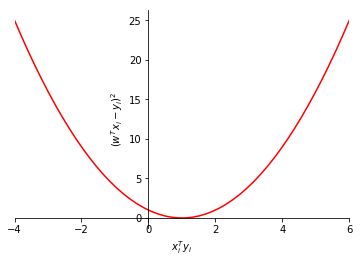

In [20]:
# 50 linearly spaced numbers
x = np.linspace(-4,6,50)

# the function, which is y_i = (w_i^Tx_i)^2 here
y = (x-1)**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# set x-axis limits
ax.set_xlim([-4, 6])

# Set axis labels
plt.xlabel('$x_i^Ty_i$')
plt.ylabel('$(w^Tx_i - y_i)^2$')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

The graph above is a vizual repersentation of the [5 cases discussed](#logistic_regression) earlier. To better explain the graph, we seperate it into 3 parts. 
<ol>
<li>
For $\vec{w}^T\vec{x}_i = 1$, then the perdiction of the model is $\widetilde y_i = sign(\vec{w}^T\vec{x}_i) = sign(+1) = +1$. From the graph, the error is also zero which is exactly what we wouyld expect from the model since a perfection perdiction should not be penalized. 
</li>
<li>
For $\vec{w}^T\vec{x}_i < 0$, then model would perdicts $\widetilde y_i = sign(\vec{w}^T\vec{x}_i) = -1$. From the graph, the error increases as $\vec{w}^T\vec{x}_i$ decreases which is exactly what we would expect since the difference between $\vec{w}^T\vec{x}_i$ and $Y_i=+1$ becomes larger in addition to the fact the wrong perdiction was made, $(\widetilde = -1) \neq +1$.
</li>
<li>
For $0 \leq \vec{w}^T\vec{x}_i <  1$, then the model perdicts $\widetilde y_i = sign(\vec{w}^T\vec{x}_i) = +1$ which is a correct perdiction since $ \widetilde y_i = y_i$. From the graph, the error increases as $\vec{w}^T\vec{x}_i$. This indicates a problem with the model since correct perdictions should not be penalized. 
</li>
<li>
For $\vec{w}^T\vec{x}_i >  1$, then the model perdicts $\widetilde y_i = sign(\vec{w}^T\vec{x}_i) = +1$ which is a correct perdiction since $ \widetilde y_i = y_i$. From the graph, the error increases as $\vec{w}^T\vec{x}_i$ increases. This indicates a problem with the model since correct perdictions should not be penalized. Furthermore, the larger the magnitude of the psotive value $\vec{w}^T\vec{x}_i$, the larger the error, which again, is indictive that the model performs poorfly against classifcation problems. 
</li>    
</ol>

In conclusion, the loss function penalizes certain weigths $\vec{w}$ despite the fact that those same wieghts were used to make corrrect perdictions. Perhaps, we can do better.
<br>

Now we will discuss the second approach to modelling classfication problems. We will consider a new model and new loss function. The new model will be $y_i\vec{w}^T\vec{x}_i$. The new loss function will be the 0-1 loss function. The model simply consists of the linear perdictor function $\vec{w}^T\vec{x}_i$ multiplied by the outcome $y_i$. This is very convienant since the sign of $y_i\vec{w}^T\vec{x}_i$ is psoitive if $sign (\vec{w}^T\vec{x}_i)= sign(y_i)$ and negative if $sign (\vec{w}^T\vec{x}_i) \neq sign(y_i)$. This is percisely the reason why all the zeros of $\vec{y}$ were covnerted to ones. The 0-1 loss function map positive $y_i\vec{w}^T\vec{x}_i$ to $+1$ and negative $y_i\vec{w}^T\vec{x}_i$ to $0$. Thus, the loss function penalizes the model whenever $sign(\vec{w}^T\vec{x}_i) \neq sign(y_i)$. Note, the loss function does not take into consideration the differences between $\vec{w}^T\vec{x}_i$ and $y_i$. 
<div style="text-align: center">  $ L(w) = I(\widetilde y \neq y) \tag{54}$</div>
I is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function). It would be useful to vizualize the loss function as a function of $y_i\vec{w}^T\vec{x}_i$.

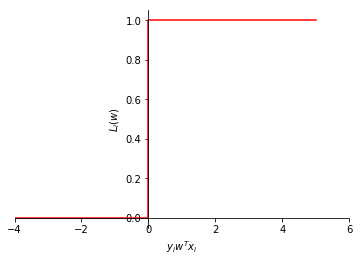

In [23]:
# The x-values y_ix_i^Ty_i to be plotted 
x = [-5, -4, -3 , -2, -1, 0, 1 , 2, 3 ,4 ,5]

# The 0-1 loss
y = [0, 0, 0 , 0, 0, 0, 1 , 1, 1 ,1 ,1]

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# set x-axis limits
ax.set_xlim([-4, 6])

# Set axis labels
plt.xlabel('$y_iw^Tx_i$')
plt.ylabel('$L_i(w)$')

# plot the function
plt.step(x, y, 'r')

# show the plot
plt.show()

The issue with using 0-1 loss function is both non-convex and not differentiable at $\vec{w}^T\vec{x}_i = 0$, so we cannot find $\vec{w}$ that would minimize the loss. 
<br>

For the next approach, 

## References

1. <a id='canada_cancer_statistics'></a> https://www.canada.ca/en/public-health/services/chronic-diseases/cancer/canadian-cancer-statistics.html

2. <a id='machinelearning_cancer'></a>Machine learning applications in cancer prognosis and prediction
Konstantina Kourou a, Themis P. Exarchos a,b, Konstantinos P. Exarchos a,
Michalis V. Karamouzis c, Dimitrios I. Fotiadis

3. <a id='cancercellimage'></a>https://en.wikipedia.org/wiki/Cancer_cell

4. <a id='columndescription'> Nuclear Feature Extraction For Breast Tumor Diagnosis W. Nick Street y William H. Wolberg z O. L. Mangasarian x December 28, 1992
    
5. Mike Gilbert's lectures

6. <a id='fractal'></a>https://en.wikipedia.org/wiki/Fractal_dimension
    
7. <a id="abdalla"></a>Correlation of Nuclear Morphometry of Breast 
Cancer in Histological Sections with 
Clinicopathological Features and Prognosis
FATHI ABDALLA1,4*, JAMELA BODER1,4*, RABIA MARKUS3, HUSSEIN HASHMI5, 
ABDELBASET BUHMEIDA2 and YRJÖ COLLAN1

8. <a id='morphology'></a>Nuclear Morphology and the Biology of 
Cancer Cells
Edgar G. Fischer

Temporary links:

http://fractalfoundation.org/OFC/OFC-10-4.html
https://en.wikipedia.org/wiki/Fractal_dimension
https://www.wahl.org/fe/HTML_version/link/FE4W/c4.htm#traditional
https://math.bu.edu/DYSYS/chaos-game/node6.html
http://www.cs.cornell.edu/courses/cs212/1998sp/handouts/Fractals/similar.html

<br>
https://www.tableau.com/learn/articles/what-is-data-cleaning

<br>
https://www.google.com/search?q=medical+data+independent+and+identically+distributed+&client=firefox-b-d&ei=S1AdYYLDK5HS9APPmoaYCQ&oq=medical+data+independent+and+identically+distributed+&gs_lcp=Cgdnd3Mtd2l6EAMyCAghEBYQHRAeOgcIABBHELADOggIABAIEAcQHjoFCCEQoAE6BQgAEIAEOggIABCABBDJAzoGCAAQFhAeOgcIIRAKEKABOgoIIRAWEAoQHRAeSgQIQRgAULVCWN6ZAWCnoAFoA3ACeACAAY4CiAH3G5IBBjI2LjUuM5gBAKABAcgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwjClN3TmLvyAhURKX0KHU-NAZMQ4dUDCA0&uact=5 http://www.icsi.berkeley.edu/pubs/vision/nonidenticallydistributeddata15.pdf https://www.quora.com/What-if-I-apply-deep-learning-to-non-i-i-d-data-like-medical-images-collected-from-different-hospitals https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables https://en.wikipedia.org/wiki/Random_variable 
https://stats.stackexchange.com/questions/213464/on-the-importance-of-the-i-i-d-assumption-in-statistical-learning https://stats.stackexchange.com/questions/17391/what-are-i-i-d-random-variables https://stats.stackexchange.com/questions/444582/clarifying-the-meaning-of-i-i-d-when-describing-a-set-of-variables https://stackoverflow.com/questions/13058379/example-for-non-iid-data 
https://stats.stackexchange.com/questions/259357/what-is-implied-by-i-i-d 
https://stats.stackexchange.com/questions/502030/i-i-d-assumption-formal-definition-vs-intuition
https://math.stackexchange.com/questions/2122110/differentiation-of-a-double-summation
https://math.stackexchange.com/questions/312077/differentiate-fx-xtax
https://math.stackexchange.com/questions/2591816/adding-a-diagonal-matrix-to-a-product-of-transpose-of-a-matrix-and-itself-is-alw
https://math.stackexchange.com/questions/2303615/is-it-true-any-real-matrix-add-an-identity-matrix-is-full-rank
https://math.stackexchange.com/questions/1374836/eigenvalues-of-the-sum-of-two-matrices-one-diagonal-and-the-other-not
https://math.stackexchange.com/questions/158219/is-a-matrix-multiplied-with-its-transpose-something-special
https://math.stackexchange.com/questions/1463140/proof-for-why-a-matrix-multiplied-by-its-transpose-is-positive-semidefinite
https://statisticaloddsandends.wordpress.com/2018/01/31/xtx-is-always-positive-semidefinite/
https://math.stackexchange.com/questions/834420/prove-that-ata-is-positive-definite
https://theory.stanford.edu/~virgi/cs367/lecture1.pdf
https://stats.stackexchange.com/questions/220243/the-proof-of-shrinking-coefficients-using-ridge-regression-through-spectral-dec
https://stats.stackexchange.com/questions/243304/how-to-prove-this-regularized-matrix-is-invertible
https://math.stackexchange.com/questions/2657380/understanding-why-linear-independent-columns-relate-to-positive-definite-matrix
https://math.stackexchange.com/questions/1690078/positive-definite-matrix-plus-positive-semi-matrix-equals-positive-definite
https://www.math.tamu.edu/~yvorobet/MATH304-504/Lect1-07web.pdf
https://proofwiki.org/wiki/Inverse_of_Diagonal_Matrix


https://stats.stackexchange.com/questions/112451/maximum-likelihood-estimation-mle-in-layman-terms
https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability
https://stats.stackexchange.com/questions/31238/what-is-the-reason-that-a-likelihood-function-is-not-a-pdf
https://mathoverflow.net/questions/10971/why-isnt-likelihood-a-probability-density-function
https://stats.stackexchange.com/questions/211965/measure-theoretic-definition-of-mle
https://stats.stackexchange.com/questions/248476/maximum-likelihood-function-for-mixed-type-distribution/397166#397166
https://en.wikipedia.org/wiki/Maximum_likelihood_estimation
https://en.wikipedia.org/wiki/Likelihood_function